# Undergraduate Final Project 
Worth 150 Points \\
Due Wednesday May 3rd at 5:00 PM \\
Student Name: Craig Price

For your final project, you will be given two datasets (posted to Moodle) that have been used in reserach at ISU over the last 5 years. \\


1.   GPWR Dataset 
2.   Battery Dataset 



In Section 1, you will use the Battery Dataset to demonstrate your knowledge of data exploration, data preperation, data visualization and regression. \\

In Section 2 and 3, you will use the GPWR Dataset to demonstrate your knowledge of data exploration, data preperation, data visualization, supervised learning and unsupervised learning. \\

Please note you will be writing a report on your findings, so make good use of comments and notes in your code. 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section 1 Regression (30 Points) 

The battery dataset contains information relating to 121 lithium batteries. It contains 4 different features. The goal of your model is to predict the cycle of the battery using the four features. Our four features are parameter related to the capacity loss due to LLI of cell i, obtained from the initial cycle to cycle nQ. Essentially, they relate to battery capacity after some time. 

**1.0 Import Data**  \\
Import the battery dataset into Colab and print the header. 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving b_data(2).csv to b_data(2) (1).csv


In [4]:
import io
batteryData = pd.read_csv(io.BytesIO(uploaded['b_data(2).csv']))
batteryData.head()

,Cycle Life,b(nQ=0.99),b(nQ=0.98),b(nQ=0.97),b(nQ=0.80)
0,1935,0.009260,0.006162,0.004908,0.003720
1,1836,0.008406,0.005927,0.004873,0.003975
2,1801,0.009137,0.006179,0.005038,0.004043
3,1642,0.009247,0.006631,0.005672,0.004430
4,1638,0.011003,0.006753,0.005207,0.004431


**1.1 Feature Engineering(5 Points)** \\
Researchers found there is a correlation between batteries at their End of Life (EOL) nQ=0.80 and the inverse of the cycle life at that capcity 1/n^0.8 or 1/cycle life, where n is the cycle life. Create a new column (1/ni^0.8) for each battery.

In [5]:
batteryData['1/ni^0.8'] = 1 / pow(batteryData['Cycle Life'],0.8)
batteryData.head(5)

,Cycle Life,b(nQ=0.99),b(nQ=0.98),b(nQ=0.97),b(nQ=0.80),1/ni^0.8
0,1935,0.009260,0.006162,0.004908,0.003720,0.002348
1,1836,0.008406,0.005927,0.004873,0.003975,0.002449
2,1801,0.009137,0.006179,0.005038,0.004043,0.002487
3,1642,0.009247,0.006631,0.005672,0.004430,0.002677
4,1638,0.011003,0.006753,0.005207,0.004431,0.002683


**Section 1.2 Train a Random Forest Regression Model(5 Points)** \\
Reseracher have told us the data is not normally distributed. As such, linear regression likely won't produce a good model. We could fix this with a special technique called Box-Cox Transformation. However, for this assignment let's train a differnt model to predict our cycle life. Split the data (80/20), verfiy the dataset sizes, train a random forest model and store your predictions.

In [6]:
target = batteryData['Cycle Life']
features = batteryData.drop('Cycle Life', axis = 1)
features.head(5)

,b(nQ=0.99),b(nQ=0.98),b(nQ=0.97),b(nQ=0.80),1/ni^0.8
0,0.009260,0.006162,0.004908,0.003720,0.002348
1,0.008406,0.005927,0.004873,0.003975,0.002449
2,0.009137,0.006179,0.005038,0.004043,0.002487
3,0.009247,0.006631,0.005672,0.004430,0.002677
4,0.011003,0.006753,0.005207,0.004431,0.002683


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 1/5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# ALL sizes look good, ready to train the model

(96, 5)
(25, 5)
(96,)
(25,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rnd_reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [9]:
predictions = rnd_reg.predict(X_test)

**Section 1.3 Model Evalution (10 Points)** \\
Now evaluate your model using RMSE and R^2. Is the model overfit/underfit? Extract the first tree from the model and plot it. Finally, print the feature importances for your model. 

In [10]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions, squared=False))
print(rnd_reg.score(X_train,y_train))
print(rnd_reg.score(X_test,y_test))

17.033710341555064
0.9983413471756796
0.9969487608801589


This model isn't overfit because the difference between training R^2 and testing R^2 is only about .002

In [13]:
extracted_tree = rnd_reg.estimators_[0]

In [14]:
from sklearn import tree
plt.figure(figsize=(150,150))
tree.plot_tree(extracted_tree, feature_names= features.columns, class_names= 'Cycle Life')

[Text(0.3306818181818182, 0.9545454545454546, 'b(nQ=0.80) <= 0.008\nsquared_error = 106327.174\nsamples = 59\nvalue = 770.385'),
 Text(0.08727272727272728, 0.8636363636363636, 'b(nQ=0.97) <= 0.006\nsquared_error = 66936.754\nsamples = 13\nvalue = 1253.136'),
 Text(0.02909090909090909, 0.7727272727272727, 'b(nQ=0.98) <= 0.006\nsquared_error = 6376.56\nsamples = 2\nvalue = 1703.2'),
 Text(0.014545454545454545, 0.6818181818181818, 'squared_error = 0.0\nsamples = 1\nvalue = 1801.0'),
 Text(0.04363636363636364, 0.6818181818181818, 'squared_error = 0.0\nsamples = 1\nvalue = 1638.0'),
 Text(0.14545454545454545, 0.7727272727272727, '1/ni^0.8 <= 0.004\nsquared_error = 7650.651\nsamples = 11\nvalue = 1120.765'),
 Text(0.07272727272727272, 0.6818181818181818, 'b(nQ=0.80) <= 0.006\nsquared_error = 3090.09\nsamples = 6\nvalue = 1182.1'),
 Text(0.04363636363636364, 0.5909090909090909, 'b(nQ=0.99) <= 0.012\nsquared_error = 576.0\nsamples = 2\nvalue = 1291.0'),
 Text(0.02909090909090909, 0.5, 'squared

In [15]:
#printing the feature importances:
importance = pd.Series(data=rnd_reg.feature_importances_, index = X_train.columns)
print(importance.sort_values(ascending=False))

1/ni^0.8      0.510930
b(nQ=0.80)    0.350864
b(nQ=0.98)    0.082773
b(nQ=0.97)    0.041375
b(nQ=0.99)    0.014058
dtype: float64


**Section 1.4 Explore Alternative Models (10 Points)**  \\
Now train three different regression models using other techniques (not linear regression) that we have discussed (kNN, SVR, etc.). Evaluate these using RMSE and R^2. Choose one of your models and attempt to improve it (Data scaling, hyper paramter tunning ,etc.) 

#K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsRegressor
#using default K = 5 had higher error and lower R^2 so I adjusted the hyperparameter n_neighbors = 3
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(X_train,y_train)
predictions2 = knn_reg.predict(X_test)

In [19]:
print(mean_squared_error(y_test, predictions2, squared=False))
print(knn_reg.score(X_train,y_train))
print(knn_reg.score(X_test,y_test))

41.52054377721414
0.929220124049618
0.9818705848735059


#Support Vector Regression

In [20]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train,y_train)
predictions3 = svr_reg.predict(X_test)

In [21]:
print(mean_squared_error(y_test, predictions3, squared=False))
print(svr_reg.score(X_train,y_train))
print(svr_reg.score(X_test,y_test))

299.3486878124589
0.06495734580244528
0.05764954243204168


these results are really terrible I think it has to do with the impact of data scaling on the SVM / SVR

#Decision Tree Regression
I already did the random forest but I wanted to see a comparison between the random forest and decision tree to see if 100 trees is better than 1

In [22]:
from sklearn import tree
dtree_reg = tree.DecisionTreeRegressor()
dtree_reg.fit(X_train,y_train)
predictions4 = dtree_reg.predict(X_test)

In [23]:
print(mean_squared_error(y_test, predictions4, squared=False))
print(dtree_reg.score(X_train,y_train))
print(dtree_reg.score(X_test,y_test))

16.156732342896568
1.0
0.9972548581607169


#Improving Support Vector Regression
The support vector regression was really bad, and although we didn't learn much about this machine learning technique in class, I wanted to try to improve it using data scaling because Dr. Mena said that data scaling has a huge impact on the support vector models.

In [113]:
#Firstly, I want to try scaling the data
from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler()
Scaled_Data = Standard_scaler.fit_transform(batteryData)
Scaled_Data = pd.DataFrame(Scaled_Data, columns=batteryData.columns)

#define new target and features
target2 = Scaled_Data['Cycle Life']
features2 = Scaled_Data.drop('Cycle Life', axis = 1)

#resplit the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 1/5)

#Retrain the SVR model
svr_reg_scaled = SVR()
svr_reg_scaled.fit(X_train2,y_train2)
predictions5 = svr_reg.predict(X_test2)

In [114]:
print(mean_squared_error(y_test2, predictions5, squared=False))
print(svr_reg_scaled.score(X_train2,y_train2))
print(svr_reg_scaled.score(X_test2,y_test2))

715.6899142241695
0.9635169264215548
0.971131709829593


Scaling the data drastically improved the R^2 values but the error is a lot higher. I think this could be due to the scaling changing the units so the error is higher

# Section 2 Supervised Learning (40 Points)

The GPWR dataset contains over 110,000 datapoints from a reactor simulator at CAES. Over 160 simulations were run to collect this data.  The dataset contains data on 12 different reactor events, 11 Transient events (abnomral situations) and 1 Non-Transient (i.e. normal operations). 
1.   Feedwater Pump Trip
2.   LOCA + LOOP & 
3. Valve Closure 
4. Rapid Power Change
5. Depressurization
6. Max Steam line Rupture
7. Manual Reactor Trip
8. Electrical Load Rejection
9. Single Coolant Pump Trip
10. Double CoolantPump Trip
11. Turbine Trip W/O SCRAM

**2.0 Import the Data:** Setup the GPWR Dataset from Moodle in to Colab. To make your life easier, use the following list of feature names when you import the data. 

In [55]:
names=['TIME', 'NORMALIZED NEUTRON FLUX', 'RCS LVL LOOP 1 WR', 'RCS LVL LOOP 1 NR', 'HOT LEG 1 TEMPERATURE'
       ,  'COLD LEG 1A “TEMPERATURE', 'COLD LEG 1B TEMPERATURE', 'HOT LEG 2 TEMPERATURE', 'COLD LEG 2A TEMPERATURE', 
       'COLD LEG 2B TEMPERATURE',  'RC LOOP-1A NORM FLOW', 'RC LOOP-1B NORM FLOW', 'RC LOOP-2A NORM FLOW', 
       'RC LOOP-2B NORM FLOW',  'PZR SURGE LINE TEMP', 'PORV DISCH PZR TEMPERATURE',
       'CONTAINMENT PRESSURE', 'CONTAINMENT TEMPERATURE', 'SG-1 NR LEVEL', 'SG-2 NR LEVEL', 
       'FW FLOW TO SG-1', 'FW FLOW TO SG-2', 'MS FLOW FROM SG-1 LINE-1A', 'MS FLOW FROM SG-1 LINE-1B', 
       'MS FLOW FROM SG-2 LINE-2A', 'MS FLOW FROM SG-2 LINE-2B', 'SG-1 PRESSURE', 'SG-2 PRESSURE', 
       'CALCULATED AVERAGE TEMPERATURE', 'PRESSURIZER PRESSURE', 'NORM PRESSURIZER LEVEL',
       'PRESSURIZER WATER TEMPERATURE', 'PRESSURIZER STEAM TEMPERATURE', 'GENERATOR POWER', "REACTOR CORE LIFE", "TRANSIENT"]

In [27]:
uploaded = files.upload()

Saving GPWRCompleteDatasetwithTransient2.csv to GPWRCompleteDatasetwithTransient2 (1).csv


In [56]:
GPWRData = pd.read_csv(io.BytesIO(uploaded['GPWRCompleteDatasetwithTransient2.csv']),names=names)
GPWRData.head(5)

,TIME,NORMALIZED NEUTRON FLUX,RCS LVL LOOP 1 WR,RCS LVL LOOP 1 NR,HOT LEG 1 TEMPERATURE,COLD LEG 1A “TEMPERATURE,COLD LEG 1B TEMPERATURE,HOT LEG 2 TEMPERATURE,COLD LEG 2A TEMPERATURE,COLD LEG 2B TEMPERATURE,...,SG-1 PRESSURE,SG-2 PRESSURE,CALCULATED AVERAGE TEMPERATURE,PRESSURIZER PRESSURE,NORM PRESSURIZER LEVEL,PRESSURIZER WATER TEMPERATURE,PRESSURIZER STEAM TEMPERATURE,GENERATOR POWER,REACTOR CORE LIFE,TRANSIENT
0,20,25.0013,2.4,4.5,578.103,562.396,562.396,578.187,562.404,562.404,...,1097.22,1097.23,570.272,2242.58,34.5050,653.191,653.191,272.320,BOL,Transient- Depressurization
1,21,24.9863,2.4,4.5,578.096,562.398,562.398,578.187,562.405,562.405,...,1097.25,1097.25,570.272,2242.12,34.4791,653.162,653.162,272.317,BOL,Transient- Depressurization
2,22,24.9727,2.4,4.5,578.094,562.399,562.399,578.189,562.406,562.406,...,1097.27,1097.27,570.272,2241.15,34.4571,653.100,653.100,272.314,BOL,Transient- Depressurization
3,23,24.9644,2.4,4.5,578.096,562.400,562.400,578.191,562.407,562.407,...,1097.29,1097.29,570.273,2239.57,34.4317,653.000,653.000,272.315,BOL,Transient- Depressurization
4,24,24.9562,2.4,4.5,578.095,562.401,562.401,578.190,562.407,562.407,...,1097.31,1097.31,570.273,2237.37,34.4016,652.859,652.859,272.318,BOL,Transient- Depressurization


**Section 2.1 Data Exploration (5 Points):** Before we start making changes to the dataset, let's explore the dataset. Using 3 differnt approaches, explore the dataset. (Keep in mind each must produce unique inferences for the data). 

In [57]:
#I know what the head looks like but I want to know what size of dataset we are dealing with.
GPWRData.shape

(111066, 36)

In [58]:
#Now that I know what the head looks like, I want to get some info about the different columns. I am mostly concerned about the numerical columns so I used:
GPWRData.describe()

,TIME,NORMALIZED NEUTRON FLUX,RCS LVL LOOP 1 WR,RCS LVL LOOP 1 NR,HOT LEG 1 TEMPERATURE,COLD LEG 1A “TEMPERATURE,COLD LEG 1B TEMPERATURE,HOT LEG 2 TEMPERATURE,COLD LEG 2A TEMPERATURE,COLD LEG 2B TEMPERATURE,...,MS FLOW FROM SG-2 LINE-2A,MS FLOW FROM SG-2 LINE-2B,SG-1 PRESSURE,SG-2 PRESSURE,CALCULATED AVERAGE TEMPERATURE,PRESSURIZER PRESSURE,NORM PRESSURIZER LEVEL,PRESSURIZER WATER TEMPERATURE,PRESSURIZER STEAM TEMPERATURE,GENERATOR POWER
count,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,...,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000,111066.000000
mean,370.668954,10.156001,2.010718,4.159378,447.159706,531.785747,527.123697,538.206841,531.505391,527.960677,...,123.026678,122.777093,985.341414,997.784752,534.566294,2086.893105,31.975383,600.715014,600.715014,108.278874
std,239.699213,23.837751,0.884728,0.774137,211.909452,85.467929,88.794848,82.232683,89.027934,88.613852,...,297.753758,297.889408,316.489401,289.500702,85.185453,220.083920,21.672634,109.192861,109.192861,337.211961
min,0.000000,0.509676,0.000000,2.400000,4.500000,140.984000,109.407000,199.179000,111.095000,99.241900,...,0.000000,0.000000,26.917100,40.837500,175.722000,1700.000000,0.000000,153.072000,153.072000,-19.339200
25%,183.000000,0.510907,2.400000,4.500000,369.230250,556.725250,556.614250,561.497000,556.776000,556.776000,...,6.087903,3.369250,1038.210000,1038.280000,563.183000,1994.900000,25.343300,636.520000,636.520000,0.000000
50%,348.000000,2.321550,2.400000,4.500000,564.819000,563.651000,563.045000,564.865000,563.652000,563.444000,...,11.890400,11.889200,1129.310000,1129.320000,564.547000,2228.580000,28.293550,652.290000,652.290000,0.000000
75%,514.000000,4.062230,2.400000,4.500000,568.619000,564.917000,564.139000,568.528000,564.915000,564.148000,...,41.414025,47.998975,1141.690000,1141.710000,567.243000,2236.730000,37.527950,652.814000,652.814000,0.000066
max,1200.000000,101.979000,2.400000,4.500000,623.947000,617.622000,577.809000,624.070000,617.659000,577.434000,...,1645.350000,1645.780000,1273.780000,1275.660000,598.453000,2318.730000,100.000000,658.021000,658.021000,1549.100000


In [59]:
#Next I wanted to see what the distribution of transient events was.
grouped = GPWRData.groupby('TRANSIENT')
for x in grouped.groups.keys():
  currentGroup = grouped.get_group(x)
  print(x)
  print(currentGroup.shape[0]/GPWRData.shape[0])

TRANSIENT-Normal Ops 
0.1622008535465399
Transient Load Rejection 
0.081032899357139
Transient Rapid Power Change 
0.027335098049808222
Transient Single Coolant Pump Trip 
0.081032899357139
Transient Total Coolant Pump Trip 
0.081032899357139
Transient Turbine Trip No SCRAM 
0.081032899357139
Transient Valve Closure 
0.081032899357139
Transient- Depressurization 
0.0811679541894009
Transient- Max Steam Line Rupture 
0.081032899357139
Transient-Feedwater Pump Trip
0.081032899357139
Transient-LOCA LOOP
0.081032899357139
Transient-Manual Trip 
0.081032899357139


**Section 2.2: Data Preprocessing** (5 Points): Before we get into training this dataset, it needs some work.  

If we look carefully, we will notice that a number of the features are percentages of actual values (which we have in the dataset). This makes these features  redundant. Let's get rid of them. Using your Python and pandas skills, drop the following features from your dataset: 


1.   NORMALIZED NEUTRON FLUX
2.   RC LOOP-1A NORM FLOW
3.   RC LOOP-1B NORM FLOW
4.   RC LOOP-2A NORM FLOW
5.   RC LOOP-2B NORM FLOW
6.   SG-1 NR LEVEL
7.   FW FLOW TO SG-1
8.   NORM PRESSURIZER LEVEL
9. TIME 

(Note that in practice, we probably would hold on to the time feature for further analysis, but in this case, we will drop it). 



In [60]:
GPWRData = GPWRData.drop(['NORMALIZED NEUTRON FLUX','RC LOOP-1A NORM FLOW','RC LOOP-1B NORM FLOW','RC LOOP-2A NORM FLOW','RC LOOP-2B NORM FLOW','SG-1 NR LEVEL','FW FLOW TO SG-1','NORM PRESSURIZER LEVEL','TIME'],axis=1)

Now let's look at the reactor core life feature. Determine how many unique values are in that feature and what these values are. 

In [61]:
print(GPWRData['REACTOR CORE LIFE'].unique().size)
print(GPWRData['REACTOR CORE LIFE'].unique())

6
['BOL' 'MOL' 'EOL' 'BOL ' 'MOL ' 'EOL ']


It looks like the person in charge of entering in the data made a mistake. There should only be 3 values.  We need to fix this before we continue. Use your knowledge of Python, pandas and/or numpy to fix this. 

In [62]:
for index, row in GPWRData.iterrows():
  if len(row['REACTOR CORE LIFE']) == 4:
    GPWRData.loc[index,'REACTOR CORE LIFE'] = row['REACTOR CORE LIFE'].strip()
print(GPWRData['REACTOR CORE LIFE'].unique())

['BOL' 'MOL' 'EOL']


You may have noticed there are some categorical features in this dataset. These data will not work with scikit learn. Convert all the categorical features into the *proper* numerical form. *Hint: double check your dataset afterward, you may have to drop the original categorical feature!*

In [63]:
pd.set_option('display.max_columns', None)
GPWRData.head(5)

,RCS LVL LOOP 1 WR,RCS LVL LOOP 1 NR,HOT LEG 1 TEMPERATURE,COLD LEG 1A “TEMPERATURE,COLD LEG 1B TEMPERATURE,HOT LEG 2 TEMPERATURE,COLD LEG 2A TEMPERATURE,COLD LEG 2B TEMPERATURE,PZR SURGE LINE TEMP,PORV DISCH PZR TEMPERATURE,CONTAINMENT PRESSURE,CONTAINMENT TEMPERATURE,SG-2 NR LEVEL,FW FLOW TO SG-2,MS FLOW FROM SG-1 LINE-1A,MS FLOW FROM SG-1 LINE-1B,MS FLOW FROM SG-2 LINE-2A,MS FLOW FROM SG-2 LINE-2B,SG-1 PRESSURE,SG-2 PRESSURE,CALCULATED AVERAGE TEMPERATURE,PRESSURIZER PRESSURE,PRESSURIZER WATER TEMPERATURE,PRESSURIZER STEAM TEMPERATURE,GENERATOR POWER,REACTOR CORE LIFE,TRANSIENT
0,2.4,4.5,578.103,562.396,562.396,578.187,562.404,562.404,616.982,108.105,0.0,110.284,53.9532,579.004,275.702,275.704,277.924,276.522,1097.22,1097.23,570.272,2242.58,653.191,653.191,272.320,BOL,Transient- Depressurization
1,2.4,4.5,578.096,562.398,562.398,578.187,562.405,562.405,617.019,114.040,0.0,110.284,53.9509,579.044,275.740,275.741,277.816,276.414,1097.25,1097.25,570.272,2242.12,653.162,653.162,272.317,BOL,Transient- Depressurization
2,2.4,4.5,578.094,562.399,562.399,578.189,562.406,562.406,617.023,133.469,0.0,110.284,53.9475,579.097,275.746,275.747,277.748,276.346,1097.27,1097.27,570.272,2241.15,653.100,653.100,272.314,BOL,Transient- Depressurization
3,2.4,4.5,578.096,562.400,562.400,578.191,562.407,562.407,617.010,171.029,0.0,110.284,53.9443,579.194,275.682,275.683,277.724,276.323,1097.29,1097.29,570.273,2239.57,653.000,653.000,272.315,BOL,Transient- Depressurization
4,2.4,4.5,578.095,562.401,562.401,578.190,562.407,562.407,616.983,177.346,0.0,110.284,53.9426,579.335,275.632,275.633,277.744,276.343,1097.31,1097.31,570.273,2237.37,652.859,652.859,272.318,BOL,Transient- Depressurization


Print the head of your data. You should have a dataset with 28 features. Double check that you have no Strings/Object values in your data. 

In [64]:
reactorCoreLifeDummies = pd.get_dummies(GPWRData['REACTOR CORE LIFE'])
GPWRData = pd.concat([GPWRData,reactorCoreLifeDummies],axis=1)
GPWRData = GPWRData.drop('REACTOR CORE LIFE',axis=1)
GPWRData

,RCS LVL LOOP 1 WR,RCS LVL LOOP 1 NR,HOT LEG 1 TEMPERATURE,COLD LEG 1A “TEMPERATURE,COLD LEG 1B TEMPERATURE,HOT LEG 2 TEMPERATURE,COLD LEG 2A TEMPERATURE,COLD LEG 2B TEMPERATURE,PZR SURGE LINE TEMP,PORV DISCH PZR TEMPERATURE,CONTAINMENT PRESSURE,CONTAINMENT TEMPERATURE,SG-2 NR LEVEL,FW FLOW TO SG-2,MS FLOW FROM SG-1 LINE-1A,MS FLOW FROM SG-1 LINE-1B,MS FLOW FROM SG-2 LINE-2A,MS FLOW FROM SG-2 LINE-2B,SG-1 PRESSURE,SG-2 PRESSURE,CALCULATED AVERAGE TEMPERATURE,PRESSURIZER PRESSURE,PRESSURIZER WATER TEMPERATURE,PRESSURIZER STEAM TEMPERATURE,GENERATOR POWER,TRANSIENT,BOL,EOL,MOL
0,2.4,4.5,578.103,562.396,562.396,578.187,562.404,562.404,616.982,108.105,0.0,110.284,53.9532,579.004,275.702,275.704,277.924,276.522,1097.22,1097.23,570.272,2242.58,653.191,653.191,272.320,Transient- Depressurization,1,0,0
1,2.4,4.5,578.096,562.398,562.398,578.187,562.405,562.405,617.019,114.040,0.0,110.284,53.9509,579.044,275.740,275.741,277.816,276.414,1097.25,1097.25,570.272,2242.12,653.162,653.162,272.317,Transient- Depressurization,1,0,0
2,2.4,4.5,578.094,562.399,562.399,578.189,562.406,562.406,617.023,133.469,0.0,110.284,53.9475,579.097,275.746,275.747,277.748,276.346,1097.27,1097.27,570.272,2241.15,653.100,653.100,272.314,Transient- Depressurization,1,0,0
3,2.4,4.5,578.096,562.400,562.400,578.191,562.407,562.407,617.010,171.029,0.0,110.284,53.9443,579.194,275.682,275.683,277.724,276.323,1097.29,1097.29,570.273,2239.57,653.000,653.000,272.315,Transient- Depressurization,1,0,0
4,2.4,4.5,578.095,562.401,562.401,578.190,562.407,562.407,616.983,177.346,0.0,110.284,53.9426,579.335,275.632,275.633,277.744,276.343,1097.31,1097.31,570.273,2237.37,652.859,652.859,272.318,Transient- Depressurization,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111061,2.4,4.5,573.678,572.803,572.803,573.654,572.713,572.713,612.014,108.280,0.0,110.253,31.6988,0.000,0.000,0.000,0.000,0.000,1218.53,1218.41,573.212,2214.30,651.363,651.363,0.000,Transient Valve Closure,0,0,1
111062,2.4,4.5,573.660,572.782,572.782,573.636,572.694,572.694,612.076,108.280,0.0,110.253,31.8325,0.000,0.000,0.000,0.000,0.000,1218.27,1218.16,573.193,2214.11,651.349,651.349,0.000,Transient Valve Closure,0,0,1
111063,2.4,4.5,573.641,572.762,572.762,573.617,572.675,572.675,612.136,108.280,0.0,110.253,31.9658,0.000,0.000,0.000,0.000,0.000,1218.01,1217.91,573.174,2213.89,651.335,651.335,0.000,Transient Valve Closure,0,0,1
111064,2.4,4.5,573.622,572.741,572.741,573.599,572.656,572.656,612.197,108.280,0.0,110.253,32.0986,0.000,0.000,0.000,0.000,0.000,1217.76,1217.66,573.154,2213.66,651.320,651.320,0.000,Transient Valve Closure,0,0,1


In [67]:
print(GPWRData.dtypes)

RCS LVL LOOP 1 WR                 float64
RCS LVL LOOP 1 NR                 float64
HOT LEG 1 TEMPERATURE             float64
COLD LEG 1A “TEMPERATURE          float64
COLD LEG 1B TEMPERATURE           float64
HOT LEG 2 TEMPERATURE             float64
COLD LEG 2A TEMPERATURE           float64
COLD LEG 2B TEMPERATURE           float64
PZR SURGE LINE TEMP               float64
PORV DISCH PZR TEMPERATURE        float64
CONTAINMENT PRESSURE              float64
CONTAINMENT TEMPERATURE           float64
SG-2 NR LEVEL                     float64
FW FLOW TO SG-2                   float64
MS FLOW FROM SG-1 LINE-1A         float64
MS FLOW FROM SG-1 LINE-1B         float64
MS FLOW FROM SG-2 LINE-2A         float64
MS FLOW FROM SG-2 LINE-2B         float64
SG-1 PRESSURE                     float64
SG-2 PRESSURE                     float64
CALCULATED AVERAGE TEMPERATURE    float64
PRESSURIZER PRESSURE              float64
PRESSURIZER WATER TEMPERATURE     float64
PRESSURIZER STEAM TEMPERATURE     

The only object type is 'Transient' Which is the target. The other 28 features are all floats or integers which is good.

**Section 2.3 Data Splitting & Feature Engineering (5 points)**  Split your data using Scikit Learn. Use a 50/50 split.

The TRANSIENT feature will be our target data for this. To make things simpler define y as the TRANSIENT Feature of your total dataset. Drop the TRANSIENT feature and define your remaining dataset as X. 

In [68]:
y = GPWRData['TRANSIENT']
X = GPWRData.drop('TRANSIENT',axis=1)
print(y.shape)
print(X.shape)
#this is the 28 columns we were talking about in the last question?

(111066,)
(111066, 28)


Split the data (use a 50/50 split) into a training and testing set. Verify the changes.

In [69]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 1/2)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(55533, 28)
(55533, 28)
(55533,)
(55533,)


This looks good. It is a 50/50 split and the X has 28 features and y has 1 which is the target

Set aside any dummy variables in your dataset (we don't want to scale these).  Use one of the scaling/feature methods (Standard Scaler, Min-Max Scaler ,etc.) and fit to your training data (hint use .fit_transform()). Transform your testing data using the same scaler (use .transform()). Again, make sure not to scale the dummy variables. 

In [70]:
#two new dataframes containing the dummy variables for each dataset
dummies_train = X_train3.loc[:,['BOL','EOL','MOL']]
dummies_test = X_test3.loc[:,['BOL','EOL','MOL']]

#I was having issues recombining the dummies with the scaled data so I reset the indices because the scaler resets the indices
dummies_train.reset_index(inplace=True)
dummies_test.reset_index(inplace=True)

In [71]:
#drop the dummies from the train and test sets
no_dummies_train = X_train3.drop(['BOL','EOL','MOL'],axis=1)
no_dummies_train.reset_index(inplace=True)
no_dummies_test = X_test3.drop(['BOL','EOL','MOL'],axis=1)
no_dummies_test.reset_index(inplace=True)

In [72]:
#scale the training data
from sklearn.preprocessing import StandardScaler
Standard_Scaler2 = StandardScaler()
Scaled_Data2 = Standard_Scaler2.fit_transform(no_dummies_train)
Scaled_Data2 = pd.DataFrame(Scaled_Data2, columns=no_dummies_train.columns)
Scaled_Data2.head(5)
#now recombine with dummies
Scaled_Data2['BOL'] = dummies_train['BOL']
Scaled_Data2['EOL'] = dummies_train['EOL']
Scaled_Data2['MOL'] = dummies_train['MOL']

Scaled_Data2 = Scaled_Data2.drop('index',axis=1)

In [73]:
#now scale the test data on the same scaler
Scaled_Data3 = Standard_Scaler2.transform(no_dummies_test)
Scaled_Data3 = pd.DataFrame(Scaled_Data3, columns=no_dummies_test.columns)
#now recombine with dummies
Scaled_Data3['BOL'] = dummies_test['BOL']
Scaled_Data3['EOL'] = dummies_test['EOL']
Scaled_Data3['MOL'] = dummies_test['MOL']

Scaled_Data3 = Scaled_Data3.drop('index',axis=1)

**Section 2.4 Model Training & Evaluation (10 Points):**
Select 3 supervised machine learning models (Decision tree, knn, etc.) and train a them using your training dataset to predict the reactor event occuring. Evaluate the model using accuracy, precision, recall, f1-score. Evaluate if your model is overfit. 

#Decision Tree

In [74]:
dTree_class = tree.DecisionTreeClassifier()
dTree_class.fit(Scaled_Data2,y_train3)
y_predictions = dTree_class.predict(Scaled_Data3)

In [75]:
#Accuracy of The model for testing and training sets
print(dTree_class.score(Scaled_Data2,y_train3))
print(dTree_class.score(Scaled_Data3,y_test3))

#Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test3,y_predictions))

#Precision score, Recall score, and f1-score
from sklearn.metrics import  precision_score, recall_score, f1_score

#Since the target is multiclass, we have to set an average so it knows how to average the different classes
#I wanted to check both with no average which prints each different category as well as with macro
print(precision_score(y_test3, y_predictions, average= None))
print(precision_score(y_test3, y_predictions, average= 'macro'))
print(recall_score(y_test3, y_predictions, average = None))
print(recall_score(y_test3, y_predictions, average= 'macro'))
print(f1_score(y_test3, y_predictions, average= None))
print(f1_score(y_test3, y_predictions, average= 'macro'))

0.9972268741108891
0.9235589649397655
0.9235589649397655
[1.         0.63446591 0.99665552 0.99133526 0.99267968 0.73837838
 0.99570136 0.99756043 1.         0.72706579 1.         0.98140681]
0.9212707613711113
[1.         0.62832637 0.9959893  0.99067496 0.99444444 0.75973304
 0.99255751 0.99888963 0.99910754 0.71598296 1.         0.97921323]
0.921243248885312
[1.         0.63138122 0.9963223  0.991005   0.99356128 0.74890351
 0.99412695 0.99822459 0.99955357 0.72148182 1.         0.98030879]
0.921239084978446


This model appears to be slightly overfit because the training set is 99.7% accurate and the testing dataset is about 92.5% accurate. This means that this model is overfit by about 7.2%.

#K Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kNN_class = KNeighborsClassifier()
kNN_class.fit(Scaled_Data2,y_train3)
y_predictions2 = kNN_class.predict(Scaled_Data3)

In [40]:
print(kNN_class.score(Scaled_Data2,y_train3))
print(kNN_class.score(Scaled_Data3,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions2))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions2, average= None))
print(precision_score(y_test3, y_predictions2, average= 'macro'))
print(recall_score(y_test3, y_predictions2, average = None))
print(recall_score(y_test3, y_predictions2, average= 'macro'))
print(f1_score(y_test3, y_predictions2, average= None))
print(f1_score(y_test3, y_predictions2, average= 'macro'))

0.9432589631390345
0.9038229521185601
0.9038229521185601
[1.         0.49330972 0.9860835  0.985724   0.98527443 0.65160445
 0.99795408 0.99799331 1.         0.77281746 1.         0.98066547]
0.9042855350463236
[1.         0.56147816 1.         0.98061317 0.98111531 0.66025216
 0.9885161  0.99466667 1.         0.688771   0.99779881 0.95973597]
0.901078945294563
[1.         0.52519116 0.99299299 0.98316194 0.98319047 0.6558998
 0.99321267 0.99632721 1.         0.72837775 0.99889819 0.97008785]
0.90227833602545


This model appears to be slightly overfit because the training set is 94.3% accurate and the testing dataset is about 90.4% accurate. This means that this model is overfit by about 3.9%.

#Support Vector Machine

In [41]:
from sklearn.svm import SVC
svm_class = SVC()
svm_class.fit(Scaled_Data2,y_train3)
y_predictions3 = svm_class.predict(Scaled_Data3)

In [42]:
print(svm_class.score(Scaled_Data2,y_train3))
print(svm_class.score(Scaled_Data3,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions3))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions3, average= 'macro'))
print(recall_score(y_test3, y_predictions3, average= 'macro'))
print(f1_score(y_test3, y_predictions3, average= 'macro'))

0.7890083373849783
0.7881619937694704
0.7881619937694704
0.8300775857016861
0.7827581754931413
0.7812628274591531


This model does not seem to be overfit becaues the testing and training scores only differ by about .1%.

**Section 2.5 Model Improvment (15 Points):**
Make 2 seperate attemps to improve each model. You can try a different scaler, adjust hyperparameters, use a different model type, etc. (You should have 6 models).Save the confusion matrix of the highest performing model for your report. \\

**Note: You will not be graded on performance, just ensure that your model performs better than a random guess.**

#Decision Tree Improvements:

In [76]:
dTree_class.get_depth()

93

In [77]:
#Firstly, I want to try limiting the max depth of the decision tree to see if that helps with the overfit
dTree_class_pruned = tree.DecisionTreeClassifier(max_depth = 18)
dTree_class_pruned.fit(Scaled_Data2,y_train3)
y_predictions4 = dTree_class_pruned.predict(Scaled_Data3)

In [78]:
#Accuracy of The model for testing and training sets
print(dTree_class_pruned.score(Scaled_Data2,y_train3))
print(dTree_class_pruned.score(Scaled_Data3,y_test3))

#Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test3,y_predictions4))

#Precision score, Recall score, and f1-score
from sklearn.metrics import  precision_score, recall_score, f1_score

#Since the target is multiclass, we have to set an average so it knows how to average the different classes
#I wanted to check both with no average which prints each different category as well as with macro
print(precision_score(y_test3, y_predictions4, average= 'macro'))
print(recall_score(y_test3, y_predictions4, average= 'macro'))
print(f1_score(y_test3, y_predictions4, average= 'macro'))

0.9278086903282733
0.9170943403021626
0.9170943403021626
0.9218459582193387
0.9145740201636432
0.9148062339312527


In [80]:
#Secondly, I am going to try a different Scaler

#scale the training data
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler()
Robust_Scaled_Train = RobustScaler.fit_transform(no_dummies_train)
Robust_Scaled_Train = pd.DataFrame(Robust_Scaled_Train, columns=no_dummies_train.columns)

#now recombine with dummies
Robust_Scaled_Train['BOL'] = dummies_train['BOL']
Robust_Scaled_Train['EOL'] = dummies_train['EOL']
Robust_Scaled_Train['MOL'] = dummies_train['MOL']

#now scale the test data on the same scaler
Robust_Scaled_Test = RobustScaler.transform(no_dummies_test)
Robust_Scaled_Test = pd.DataFrame(Robust_Scaled_Test, columns=no_dummies_test.columns)

#now recombine with dummies
Robust_Scaled_Test['BOL'] = dummies_test['BOL']
Robust_Scaled_Test['EOL'] = dummies_test['EOL']
Robust_Scaled_Test['MOL'] = dummies_test['MOL']

Robust_Scaled_Train = Robust_Scaled_Train.drop('index',axis=1)
Robust_Scaled_Test = Robust_Scaled_Test.drop('index',axis=1)

In [81]:
dTree_class_Robust = tree.DecisionTreeClassifier()
dTree_class_Robust.fit(Robust_Scaled_Train,y_train3)
y_predictions5 = dTree_class_Robust.predict(Robust_Scaled_Test)

In [82]:
#Accuracy of The model for testing and training sets
print(dTree_class_Robust.score(Robust_Scaled_Train,y_train3))
print(dTree_class_Robust.score(Robust_Scaled_Test,y_test3))

#Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test3,y_predictions5))

#Precision score, Recall score, and f1-score
from sklearn.metrics import  precision_score, recall_score, f1_score

#Since the target is multiclass, we have to set an average so it knows how to average the different classes
#I wanted to check both with no average which prints each different category as well as with macro
print(precision_score(y_test3, y_predictions5, average= 'macro'))
print(recall_score(y_test3, y_predictions5, average= 'macro'))
print(f1_score(y_test3, y_predictions5, average= 'macro'))

0.9972268741108891
0.9238110672933211
0.9238110672933211
0.9218117416557391
0.9215754819441632
0.9216836080696025


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test3,y_predictions4)

array([[9105,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0, 3303,    0,    0,    0,  131,    0,    0,    0, 1047,    0,
          66],
       [   0,    0, 1491,    0,    0,    0,    2,    1,    0,    2,    0,
           0],
       [   0,   14,    0, 4438,   14,   17,    1,    0,    0,    4,    0,
          16],
       [   0,   12,    0,   10, 4458,    7,    2,    0,    0,    9,    0,
           2],
       [   0, 1477,    0,    2,    0, 2475,    0,    0,    0,  471,    0,
          70],
       [   0,   16,    2,    8,    7,    1, 4389,    1,    0,    9,    0,
           1],
       [   0,    1,    0,    0,    0,    0,    2, 4498,    0,    1,    0,
           1],
       [   0,    0,    0,    2,    0,    0,    0,    2, 4475,    0,    3,
           0],
       [   0,  641,    3,    2,    0,   90,    3,    0,    0, 3718,    0,
           4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    3,    0, 4529,
           0],
       [   0,   99,  

#K Nearest Neighbors Improvements

In [ ]:
#Firstly I want to try to improve this model by changing the hyperparameter n_neighbors which is the number of nearest neighbors the model uses. The default is 5.

kNN_class2 = KNeighborsClassifier(n_neighbors=8)
kNN_class2.fit(Scaled_Data2,y_train3)
y_predictions6 = kNN_class.predict(Scaled_Data3)

In [ ]:
print(kNN_class2.score(Scaled_Data2,y_train3))
print(kNN_class2.score(Scaled_Data3,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions6))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions6, average= 'macro'))
print(recall_score(y_test3, y_predictions6, average= 'macro'))
print(f1_score(y_test3, y_predictions6, average= 'macro'))

0.9314821817657969
0.8947832820124971
0.9022563160643221
0.9032930560496598
0.8994224106509279
0.9007836756267594


In [ ]:
#I also wanted to try the knn with the robust scaler.
from sklearn.neighbors import KNeighborsClassifier
kNN_class3 = KNeighborsClassifier()
kNN_class3.fit(Robust_Scaled_Train,y_train3)
y_predictions7 = kNN_class3.predict(Robust_Scaled_Test)

In [ ]:
print(kNN_class3.score(Robust_Scaled_Train,y_train3))
print(kNN_class3.score(Robust_Scaled_Test,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions7))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions7, average= 'macro'))
print(recall_score(y_test3, y_predictions7, average= 'macro'))
print(f1_score(y_test3, y_predictions7, average= 'macro'))

0.9137449804620676
0.8602452595753876
0.8602452595753876
0.8602385035388981
0.8545945438482092
0.856544577537636


#SVM Improvements

In [ ]:
#The first thing I wanted to try was a different SVM from the notes that Dr. Mena Said works better for larger samples. I want to try this because the first SVC took up to 5 minutes to fit the data.
from sklearn.linear_model import SGDClassifier
SGD_class = SGDClassifier(n_jobs = -1)
SGD_class.fit(Scaled_Data2,y_train3)
y_predictions8 = SGD_class.predict(Scaled_Data3)

In [ ]:
print(SGD_class.score(Scaled_Data2,y_train3))
print(SGD_class.score(Scaled_Data3,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions8))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions8, average= 'macro'))
print(recall_score(y_test3, y_predictions8, average= 'macro'))
print(f1_score(y_test3, y_predictions8, average= 'macro'))

0.7589721426899321
0.7589901500009004
0.7589901500009004
0.7975810625019496
0.7524091468254649
0.7165179703895498


In [ ]:
#I wanted to try another the SVC with polynomial kernel instead of the default as a hyperparameter
svc_class2 = SVC(kernel='poly',degree=4)
svc_class2.fit(Scaled_Data2,y_train3)
y_predictions9 = svc_class2.predict(Scaled_Data3)

In [ ]:
print(svc_class2.score(Scaled_Data2,y_train3))
print(svc_class2.score(Scaled_Data3,y_test3))

#Accuracy Score
print(accuracy_score(y_test3,y_predictions9))

##Precision score, Recall score, and f1-score
print(precision_score(y_test3, y_predictions9, average= 'macro'))
print(recall_score(y_test3, y_predictions9, average= 'macro'))
print(f1_score(y_test3, y_predictions9, average= 'macro'))

0.702051032719284
0.7051662975167918
0.7051662975167918
0.799836938300269
0.6966055621892683
0.6876488709356888


# Section 3 Unsupervised Learning (50 Points)
You will use kmeans to develop and evaluate an unsupervised model using GPWR. 

**Section 3.1 Deminsionality Reduction (10 Points)** \\
The first thing we want to do is visualize our data. However, our data has a high deminsionality (28 features). We need to reduce this dataset down to 2, so we can plot it on an X-Y plot. Use one of the deminsionality reduction techniques we discussed in class to reduce the GPWR dataset to 2 dimensions. 

In [84]:
#I already have the GPWR data split into X and y values, no need for Train Test split because these models are unsupervised
from sklearn.decomposition import PCA
pca2D = PCA(n_components=2)
X_PCA_2D = pca2D.fit_transform(X)
X_PCA_2D.shape

(111066, 2)

**Section 3.2 Training an Unsupervised Model(10 Points)** \\
Train a kmeans model using 12 clusters. Evaluate your model by plotting each of the 12 clusters. 

In [85]:
#Training the kmeans model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12) 
kmeans.fit(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [86]:
y_pred=kmeans.predict(X_PCA_2D)

In [87]:
def plot_clusters(X, y=None):
  plt.scatter(X[:,0],X[:,1], c=y.astype(int), s=1)

Text(0.5, 1.0, '12 Cluster K means')

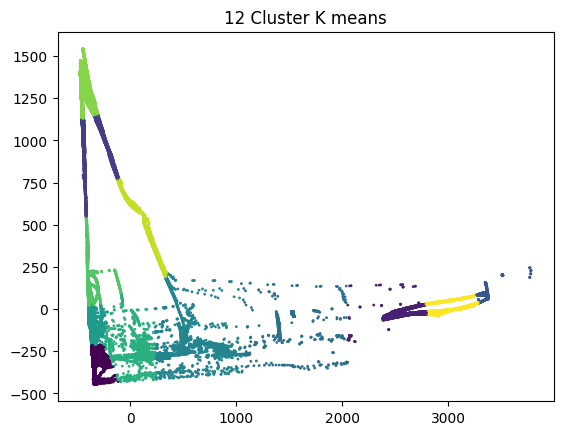

In [89]:
plot_clusters(X_PCA_2D, y_pred)
plt.title('12 Cluster K means')

**Section 3.3 Training more Kmeans Models (10 Points)** \\
Due to the nature of our data, we know there should be 12 groups. However, in most cases with unsupervised learning, we don't know this. Train a kmeans model for 2,4,6,8 & 10 clusters. Plot these clusters. 

#2 Clusters

In [91]:
kmeans2 = KMeans(n_clusters=2) 
kmeans2.fit(X_PCA_2D)
y_pred2 = kmeans2.predict(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2 Cluster K means')

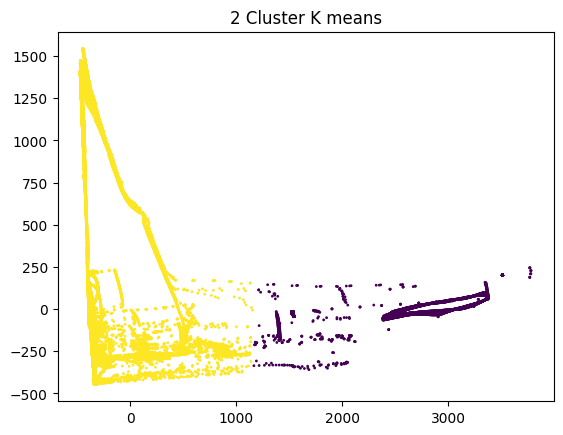

In [92]:
plot_clusters(X_PCA_2D, y_pred2)
plt.title('2 Cluster K means')

#4 Clusters

In [94]:
kmeans4 = KMeans(n_clusters=4) 
kmeans4.fit(X_PCA_2D)
y_pred4 = kmeans4.predict(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '4 Cluster K means')

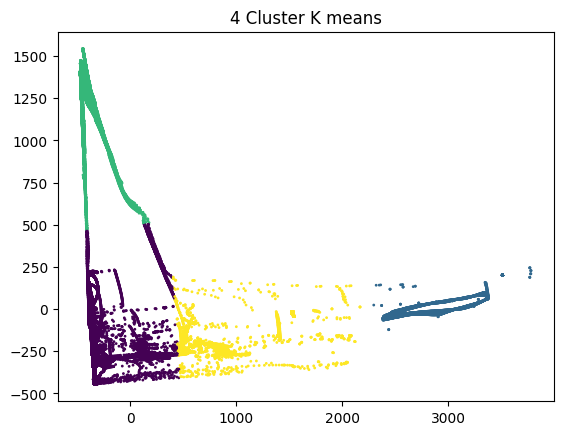

In [95]:
plot_clusters(X_PCA_2D, y_pred4)
plt.title('4 Cluster K means')

#6 Clusters

In [96]:
kmeans6 = KMeans(n_clusters=6) 
kmeans6.fit(X_PCA_2D)
y_pred6 = kmeans6.predict(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '6 Cluster K means')

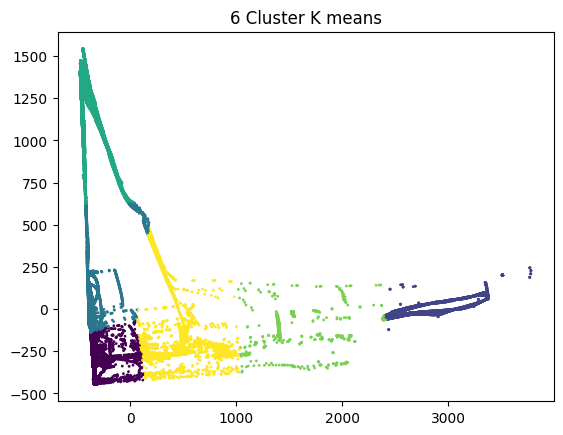

In [97]:
plot_clusters(X_PCA_2D, y_pred6)
plt.title('6 Cluster K means')

#8 Clusters

In [98]:
kmeans8 = KMeans(n_clusters=8) 
kmeans8.fit(X_PCA_2D)
y_pred8 = kmeans8.predict(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '8 Cluster K means')

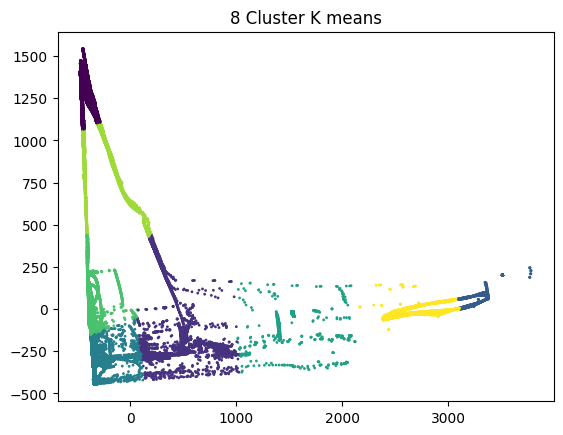

In [99]:
plot_clusters(X_PCA_2D, y_pred8)
plt.title('8 Cluster K means')

#10 Clusters

In [100]:
kmeans10 = KMeans(n_clusters=10) 
kmeans10.fit(X_PCA_2D)
y_pred10 = kmeans10.predict(X_PCA_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '10 Cluster K means')

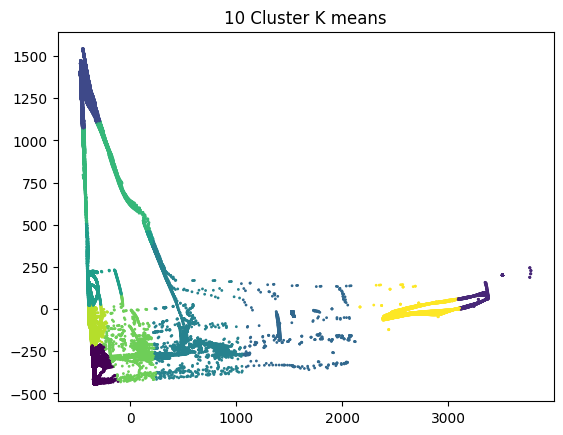

In [101]:
plot_clusters(X_PCA_2D, y_pred10)
plt.title('10 Cluster K means')

#Section 3.4

**Section 3.4 Evaulating the Kmeans Models (10 Points)** \\
When working with unsupervised learning, we usually do not know any actual values, so we cannot calculate accuacy and other valiadation measurments (though in this case we could, since we have the actual results). Instead, we can use inertia and silhouette score to estimate our ideal number of clusters. Perform these calcualtions for your six kmeans models. Plot these values. In your report, evaluate how this number compares to the actual value we know (12). 

In [115]:
clusters = [2,4,6,8,10,12]
inertia_scores = [kmeans2.inertia_,kmeans4.inertia_,kmeans6.inertia_,kmeans8.inertia_,kmeans10.inertia_,kmeans.inertia_,]
inertia_scores

[42667524497.29059,
 6609829391.091442,
 3574649947.941565,
 2015593803.6428697,
 1344426025.6010227,
 1053616146.358204]

Text(0, 0.5, 'Inertia')

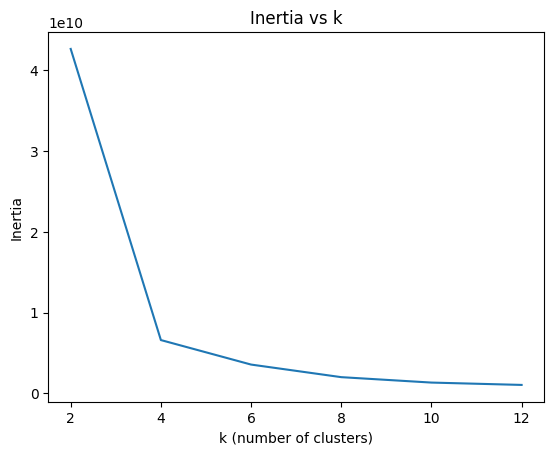

In [116]:
plt.plot(clusters, inertia_scores)
plt.title("Inertia vs k")
plt.xlabel("k (number of clusters)")
plt.ylabel('Inertia')

In [119]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_PCA_2D, kmeans2.labels_),silhouette_score(X_PCA_2D, kmeans4.labels_),silhouette_score(X_PCA_2D, kmeans6.labels_),silhouette_score(X_PCA_2D, kmeans8.labels_),silhouette_score(X_PCA_2D, kmeans10.labels_),silhouette_score(X_PCA_2D, kmeans.labels_)]
silhouette_scores

[0.7842291037691093,
 0.810309216798438,
 0.6514966582828938,
 0.6312219524746082,
 0.6455361147105161,
 0.6459670371684533]

Text(0, 0.5, 'Silhouette Score')

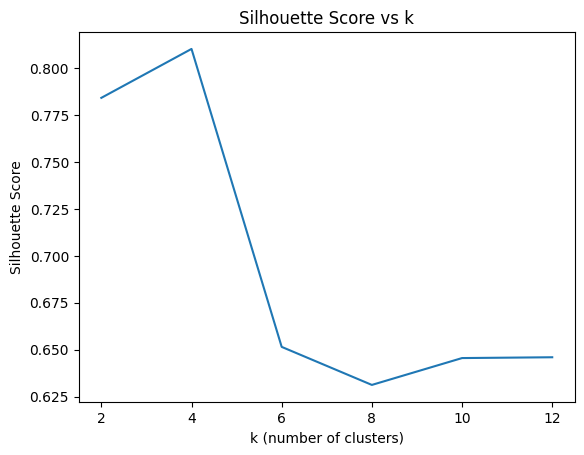

In [120]:
plt.plot(clusters, silhouette_scores)
plt.title("Silhouette Score vs k")
plt.xlabel("k (number of clusters)")
plt.ylabel('Silhouette Score')

**Section 3.5 Trying Different Approaches with Unsupervised Learning (10 Points)** \\
Use DBSCAN Clustering to train a new unsupervised model using your GPWR data. Plot your clusters. In your report, compare how this performed to your 12 cluster kmeans model. 

In [102]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples = 12)#note the eps value 
dbscan.fit(X_PCA_2D)
ypred_dbscan = dbscan.fit_predict(X_PCA_2D)

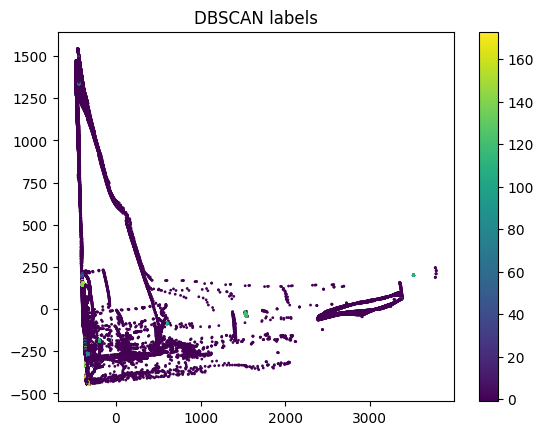

In [103]:
plt.scatter(X_PCA_2D[:,0],X_PCA_2D[:,1],c=dbscan.labels_,s=1)
plt.title("DBSCAN labels")
plt.colorbar()

plt.show()

In [74]:
print(silhouette_score(X_PCA_2D, dbscan.labels_))

-0.36738290292933196


## Final Report (30 Points)
Now that you have completed training all your models for both datasets, write a report between 2 and 3 pages, summarizing the work you did in each section. Include: 



1.   The data used 
2.   The approach you used to prepare your data 
3. The models you trained 
4. The results from your models

Include a seperate appendix, with all revelant figures from your work (you do not have to include the decision tree from Section 1 in the report). Be sure to include tables summarizing your models from each section (include the model type and all validation results). 
Turn in a .doc or .pdf to moodle, along with your notebook. 

